In [1634]:
#Prompt user for file input, catch with a defaut if statement
fname = input('Enter file name: ')

import re
import pandas as pd



if (len(fname) < 1): fname = 'ewbf.log'
    
    
# Open file and isolate lines that start with 
fh = open(fname)

d = dict()
lst = list()

for lines in fh:
    if not lines.startswith('GPU0: '): continue
    #if re.search('^X\S*: [0-9.]+', line):    
    x = lines.split(' ')    
    #print(x)
    
    
    gpu0 = x[0]
    gpu0_h = x[1]
    gpu1 = x[3]
    gpu1_h = x[4]
    gpu2 = x[6]
    gpu2_h = x[7]
    gpu3 = x[9]
    gpu3_h = x[10]
    gpu4 = x[12]
    gpu4_h = x[13]
    gpu5 = x[15]
    gpu5_h = x[16]
    gpu6 = x[18]
    gpu6_h = x[19]
    gpu7 = x[21]
    gpu7_h = x[22]
    gpu8 = x[24]
    gpu8_h = x[25]
    gpu9 = x[27]
    gpu9_h = x[28]
    gpu10 = x[30]
    gpu10_h = x[31]
    gpu11 = x[33]
    gpu11_h = x[34]
    gpu12 = x[36]
    gpu12_h = x[37]

    d[gpu0] = gpu0_h
    d[gpu1] = gpu1_h
    d[gpu2] = gpu2_h
    d[gpu3] = gpu3_h
    d[gpu4] = gpu4_h
    d[gpu5] = gpu5_h
    d[gpu6] = gpu6_h
    d[gpu7] = gpu7_h
    d[gpu8] = gpu8_h
    d[gpu9] = gpu9_h
    d[gpu10] = gpu10_h
    d[gpu11] = gpu11_h
    d[gpu12] = gpu12_h



    for key in d:
        value = d[key]
        lst.append( (key, value) )
        
        #print(lst)

df = pd.DataFrame(lst)
df.columns = ['GPU Number', 'Sol/s']

df.head()


#df = pd.DataFrame.from_dict(d, orient = 'index')
#df
    

Enter file name: 


,GPU Number,Sol/s
0,GPU0:,488
1,GPU1:,513
2,GPU2:,498
3,GPU3:,496
4,GPU4:,465


In [1635]:
df.head()

,GPU Number,Sol/s
0,GPU0:,488
1,GPU1:,513
2,GPU2:,498
3,GPU3:,496
4,GPU4:,465


In [1636]:
# Data has been reported every 30 seconds

df_gpu0_sols = df.loc[df['GPU Number'] == 'GPU0:']
df_gpu0_sols.head(20)


,GPU Number,Sol/s
0,GPU0:,488
13,GPU0:,478
26,GPU0:,479
39,GPU0:,473
52,GPU0:,464
65,GPU0:,472
78,GPU0:,471
91,GPU0:,475
104,GPU0:,467
117,GPU0:,470


In [1637]:
#df_gpu0_sols.reset_index()
#df.reset_index().rename(columns={df.index.name:'Index'})

#df_gpu0_sols.rename_axis('Index').reset_index()
df_gpu0_sols.head()

,GPU Number,Sol/s
0,GPU0:,488
13,GPU0:,478
26,GPU0:,479
39,GPU0:,473
52,GPU0:,464


In [1638]:
# Data has been reported every 30 seconds

#df_gpu0_sols = df.loc[df['GPU Number'] == 'GPU0:']
df_gpu0_sols.reset_index(inplace=True)
del df_gpu0_sols['index']
#df_gpu0_sols.columns = ['Minutes', 'GPU Number', 'Sol/s']
df_gpu0_sols.head()



    

,GPU Number,Sol/s
0,GPU0:,488
1,GPU0:,478
2,GPU0:,479
3,GPU0:,473
4,GPU0:,464


In [1639]:
rows = df.index.values
#rows_0 = df_gpu0_sols.index.values

lst = list()

for time in rows:
    secs = (30 + (time * 30))  
    minutes = secs / 60
    hrs = minutes / 60
    #print(minutes)
    
        
    lst.append(minutes)
#print(lst)
    
columns = ['Minutes']    
df_minutes = pd.DataFrame(lst, columns = columns)
df_minutes.head()

df_gpu0_sols = pd.concat([df_gpu0_sols, df_minutes], axis = 1)
df_gpu0_sols = df_gpu0_sols.dropna()
df_gpu0_sols.head()

,GPU Number,Sol/s,Minutes
0,GPU0:,488,0.5
1,GPU0:,478,1.0
2,GPU0:,479,1.5
3,GPU0:,473,2.0
4,GPU0:,464,2.5


In [1640]:
# df_gpu0_sols = pd.concat([df_gpu0_sols, df_minutes], axis = 1)
# df_gpu0_sols

# # To remove NaN values

# df_gpu0_sols.dropna(axis = 0).head()

In [1641]:
# df_gpu0_sols = df_gpu0_sols.dropna()
# #df_gpu0_sols.sort_values(by=['Minutes'], ascending = True)

# df_gpu0_sols.head()

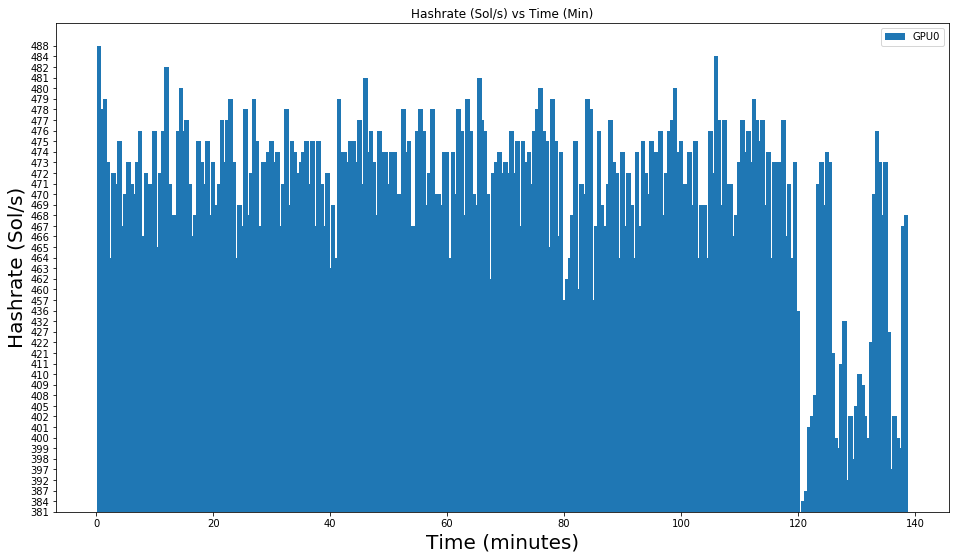

In [1642]:
import matplotlib.pyplot as plt
import numpy as np

#df_gpu0_sols.plot(x = 'Minutes', y = 'Sol/s')
plt.bar(df_gpu0_sols['Minutes'], df_gpu0_sols['Sol/s'], align='center', alpha=1.0, label='GPU0')
plt.title('Hashrate (Sol/s) vs Time (Min)')
plt.xlabel('Time (minutes)', size = 20)
plt.ylabel('Hashrate (Sol/s)', size = 20)

#ax = plt.subplots()
#ax.yticks(np.arange(380, 480, 500))
#plt.ylim(ymin=0)
#plt.yticks(fontsize=5)
plt.legend()
plt.show()

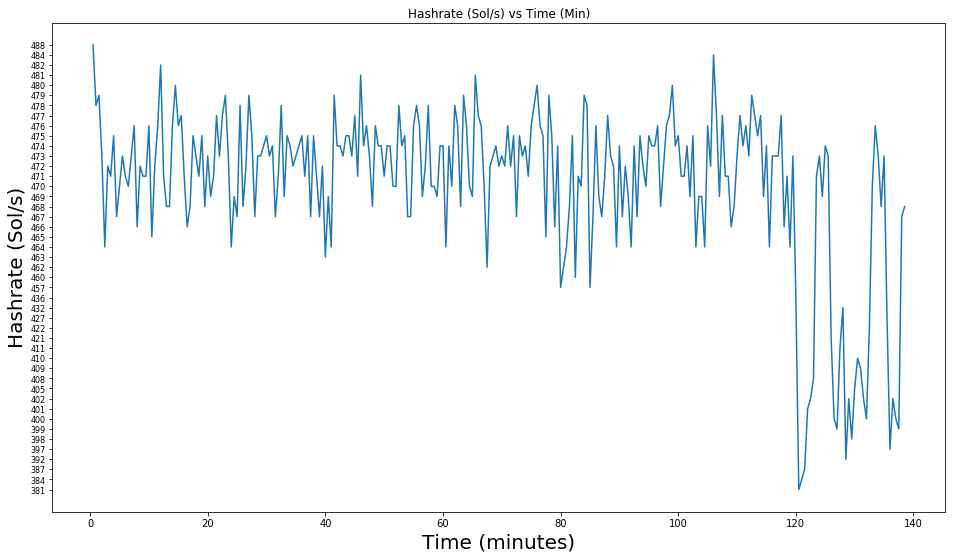

In [1643]:
plt.plot(df_gpu0_sols['Minutes'], df_gpu0_sols['Sol/s'])

plt.title('Hashrate (Sol/s) vs Time (Min)')
plt.xlabel('Time (minutes)', size = 20)
plt.ylabel('Hashrate (Sol/s)', size = 20)
plt.yticks(fontsize=8)
plt.figure(figsize=(10,8), dpi=800)

plt.show()



In [1644]:
# rows = df.index.values
# #rows_0 = df_gpu0_sols.index.values

# lst = list()

# for time in rows:
#     secs = time * (30/14)  
#     minutes = secs / 60
#     hrs = minutes / 60
#     #print(minutes)
    
        
#     lst.append(minutes)
# #print(lst)
    
# columns = ['Minutes']    
# df_minutes = pd.DataFrame(lst, columns = columns)
# df_minutes
    

In [1645]:
# df_gpu1_sols = df.loc[df['GPU Number'] == 'GPU1:']
# df_gpu1_sols = pd.concat([df_gpu1_sols, df_minutes], axis = 1)

# # To remove NaN values
# ### Do not forget this or graphs will not work
# df_gpu1_sols = df_gpu1_sols.dropna(axis = 0)
# df_gpu1_sols


In [1646]:
#df_gpu1_sols = pd.DataFrame(df_gpu1_sols['Sol/s'], dtype=float)
#df_gpu1_sols
#df_gpu1_sols.dropna().head()

In [1647]:
df['Sol/s'].mean()

inf

In [1648]:
df['Sol/s'].describe()

count     3601
unique     103
top        487
freq       133
Name: Sol/s, dtype: object

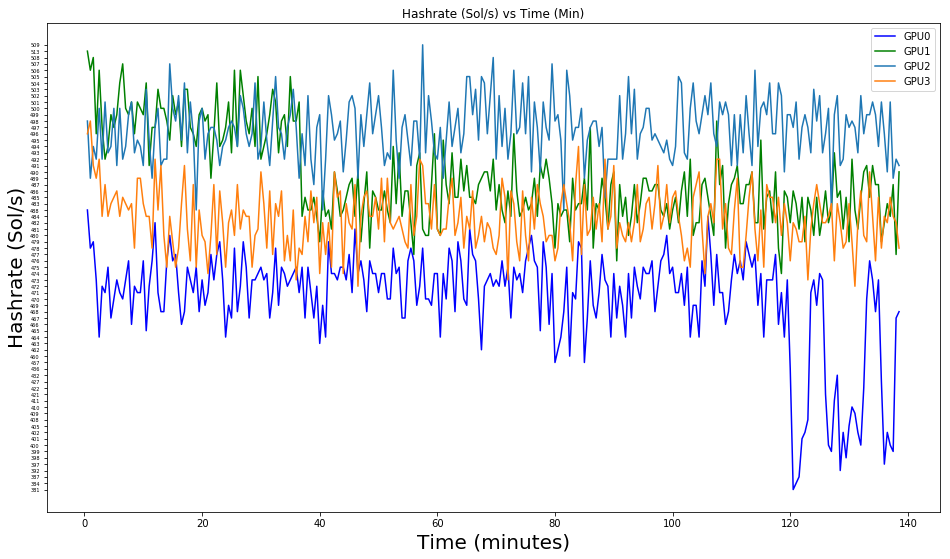

In [1649]:
df_gpu0_sols = df.loc[df['GPU Number'] == 'GPU0:']
df_gpu0_sols.reset_index(inplace=True)
del df_gpu0_sols['index']
df_gpu0_sols.columns = ['GPU Number', 'Sol/s']
df_gpu0_sols = pd.concat([df_gpu0_sols, df_minutes], axis = 1)
df_gpu0_sols = df_gpu0_sols.dropna()

df_gpu1_sols = df.loc[df['GPU Number'] == 'GPU1:']
df_gpu1_sols.reset_index(inplace=True)
del df_gpu1_sols['index']
df_gpu1_sols.columns = ['GPU Number', 'Sol/s']
df_gpu1_sols = pd.concat([df_gpu1_sols, df_minutes], axis = 1)
df_gpu1_sols = df_gpu1_sols.dropna()

df_gpu2_sols = df.loc[df['GPU Number'] == 'GPU2:']
df_gpu2_sols.reset_index(inplace=True)
del df_gpu2_sols['index']
df_gpu2_sols.columns = ['GPU Number', 'Sol/s']
df_gpu2_sols = pd.concat([df_gpu2_sols, df_minutes], axis = 1)
df_gpu2_sols = df_gpu2_sols.dropna()

df_gpu3_sols = df.loc[df['GPU Number'] == 'GPU3:']
df_gpu3_sols.reset_index(inplace=True)
del df_gpu3_sols['index']
df_gpu3_sols.columns = ['GPU Number', 'Sol/s']
df_gpu3_sols = pd.concat([df_gpu3_sols, df_minutes], axis = 1)
df_gpu3_sols = df_gpu3_sols.dropna()


plt.plot(df_gpu0_sols['Minutes'], df_gpu0_sols['Sol/s'], label = 'GPU0', color = 'b')
plt.plot(df_gpu1_sols['Minutes'], df_gpu1_sols['Sol/s'], label = 'GPU1', color = 'g')
plt.plot(df_gpu2_sols['Minutes'], df_gpu2_sols['Sol/s'], label = 'GPU2')
plt.plot(df_gpu3_sols['Minutes'], df_gpu3_sols['Sol/s'], label = 'GPU3')



plt.title('Hashrate (Sol/s) vs Time (Min)')
plt.xlabel('Time (minutes)', size = 20)
plt.ylabel('Hashrate (Sol/s)', size = 20)
plt.yticks(fontsize=5)
#plt.figure(figsize=(200,100))
plt.legend()
plt.show()

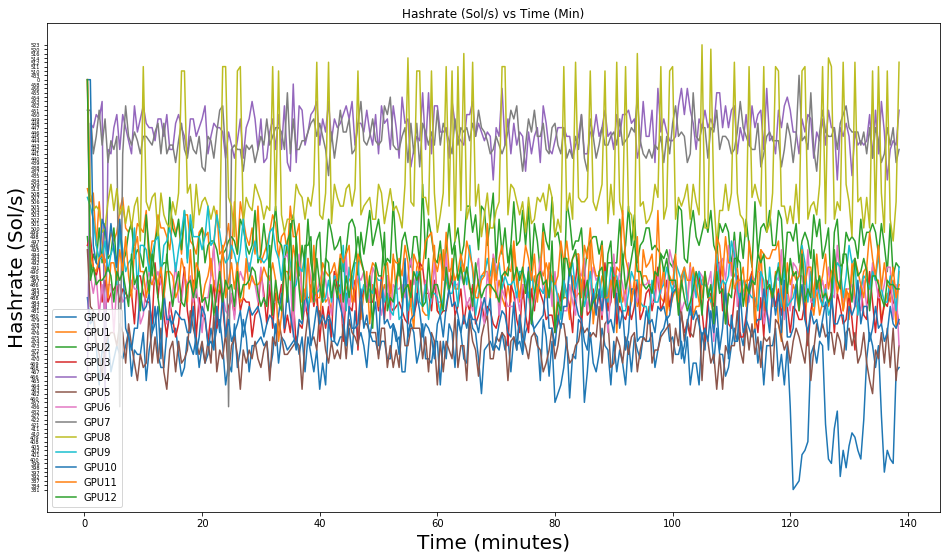

In [1650]:


df_gpu4_sols = df.loc[df['GPU Number'] == 'GPU4:']
df_gpu4_sols.reset_index(inplace=True)
del df_gpu4_sols['index']
df_gpu4_sols.columns = ['GPU Number', 'Sol/s']
df_gpu4_sols = pd.concat([df_gpu4_sols, df_minutes], axis = 1)

df_gpu5_sols = df.loc[df['GPU Number'] == 'GPU5:']
df_gpu5_sols.reset_index(inplace=True)
del df_gpu5_sols['index']
df_gpu5_sols.columns = ['GPU Number', 'Sol/s']
df_gpu5_sols = pd.concat([df_gpu5_sols, df_minutes], axis = 1)

df_gpu6_sols = df.loc[df['GPU Number'] == 'GPU6:']
df_gpu6_sols.reset_index(inplace=True)
del df_gpu6_sols['index']
df_gpu6_sols.columns = ['GPU Number', 'Sol/s']
df_gpu6_sols = pd.concat([df_gpu6_sols, df_minutes], axis = 1)

df_gpu7_sols = df.loc[df['GPU Number'] == 'GPU7:']
df_gpu7_sols.reset_index(inplace=True)
del df_gpu7_sols['index']
df_gpu7_sols.columns = ['GPU Number', 'Sol/s']
df_gpu7_sols = pd.concat([df_gpu7_sols, df_minutes], axis = 1)

df_gpu8_sols = df.loc[df['GPU Number'] == 'GPU8:']
df_gpu8_sols.reset_index(inplace=True)
del df_gpu8_sols['index']
df_gpu8_sols.columns = ['GPU Number', 'Sol/s']
df_gpu8_sols = pd.concat([df_gpu8_sols, df_minutes], axis = 1)

df_gpu9_sols = df.loc[df['GPU Number'] == 'GPU9:']
df_gpu9_sols.reset_index(inplace=True)
del df_gpu9_sols['index']
df_gpu9_sols.columns = ['GPU Number', 'Sol/s']
df_gpu9_sols = pd.concat([df_gpu9_sols, df_minutes], axis = 1)

df_gpu10_sols = df.loc[df['GPU Number'] == 'GPU10:']
df_gpu10_sols.reset_index(inplace=True)
del df_gpu10_sols['index']
df_gpu10_sols.columns = ['GPU Number', 'Sol/s']
df_gpu10_sols = pd.concat([df_gpu10_sols, df_minutes], axis = 1)

df_gpu11_sols = df.loc[df['GPU Number'] == 'GPU11:']
df_gpu11_sols.reset_index(inplace=True)
del df_gpu11_sols['index']
df_gpu11_sols.columns = ['GPU Number', 'Sol/s']
df_gpu11_sols = pd.concat([df_gpu11_sols, df_minutes], axis = 1)

df_gpu12_sols = df.loc[df['GPU Number'] == 'GPU12:']
df_gpu12_sols.reset_index(inplace=True)
del df_gpu12_sols['index']
df_gpu12_sols.columns = ['GPU Number', 'Sol/s']
df_gpu12_sols = pd.concat([df_gpu12_sols, df_minutes], axis = 1)


# To remove NaN values, Do not forget this or graphs will not work
df_gpu2_sols = df_gpu2_sols.dropna(axis = 0)
#print(df_gpu2_sols)
df_gpu3_sols = df_gpu3_sols.dropna(axis = 0)
#print(df_gpu2_sols)
df_gpu4_sols = df_gpu4_sols.dropna(axis = 0)

df_gpu5_sols = df_gpu5_sols.dropna(axis = 0)

df_gpu6_sols = df_gpu6_sols.dropna(axis = 0)

df_gpu7_sols = df_gpu7_sols.dropna(axis = 0)

df_gpu8_sols = df_gpu8_sols.dropna(axis = 0)

df_gpu9_sols = df_gpu9_sols.dropna(axis = 0)

df_gpu10_sols = df_gpu10_sols.dropna(axis = 0)

df_gpu11_sols = df_gpu11_sols.dropna(axis = 0)

df_gpu12_sols = df_gpu12_sols.dropna(axis = 0)


plt.plot(df_gpu0_sols['Minutes'], df_gpu0_sols['Sol/s'], label = 'GPU0')
plt.plot(df_gpu1_sols['Minutes'], df_gpu1_sols['Sol/s'], label = 'GPU1')
plt.plot(df_gpu2_sols['Minutes'], df_gpu2_sols['Sol/s'], label = 'GPU2')
plt.plot(df_gpu3_sols['Minutes'], df_gpu3_sols['Sol/s'], label = 'GPU3')
plt.plot(df_gpu4_sols['Minutes'], df_gpu4_sols['Sol/s'], label = 'GPU4')
plt.plot(df_gpu5_sols['Minutes'], df_gpu5_sols['Sol/s'], label = 'GPU5')
plt.plot(df_gpu6_sols['Minutes'], df_gpu6_sols['Sol/s'], label = 'GPU6')
plt.plot(df_gpu7_sols['Minutes'], df_gpu7_sols['Sol/s'], label = 'GPU7')
plt.plot(df_gpu8_sols['Minutes'], df_gpu8_sols['Sol/s'], label = 'GPU8')
plt.plot(df_gpu9_sols['Minutes'], df_gpu9_sols['Sol/s'], label = 'GPU9')
plt.plot(df_gpu10_sols['Minutes'], df_gpu10_sols['Sol/s'], label = 'GPU10')
plt.plot(df_gpu11_sols['Minutes'], df_gpu11_sols['Sol/s'], label = 'GPU11')
plt.plot(df_gpu12_sols['Minutes'], df_gpu12_sols['Sol/s'], label = 'GPU12')




plt.title('Hashrate (Sol/s) vs Time (Min)')
plt.xlabel('Time (minutes)', size = 20)
plt.ylabel('Hashrate (Sol/s)', size = 20)
plt.yticks(fontsize=5)
#plt.xlim(0, )
#plt.ylim(0, )
#plt.figure(figsize=(200,100))
plt.rcParams["figure.figsize"] = [16,9]
plt.legend()
plt.show()


In [1651]:
df_gpu0_sols['Sol/s'] = df_gpu0_sols['Sol/s'].astype(int)
gpu0_sols_mean = round(df_gpu0_sols['Sol/s'].mean(), 2)

df_gpu1_sols['Sol/s'] = df_gpu1_sols['Sol/s'].astype(int)
gpu1_sols_mean = round(df_gpu1_sols['Sol/s'].mean(), 2)

df_gpu2_sols['Sol/s'] = df_gpu2_sols['Sol/s'].astype(int)
gpu2_sols_mean = round(df_gpu2_sols['Sol/s'].mean(), 2)

df_gpu3_sols['Sol/s'] = df_gpu3_sols['Sol/s'].astype(int)
gpu3_sols_mean = round(df_gpu3_sols['Sol/s'].mean(), 2)

df_gpu4_sols['Sol/s'] = df_gpu4_sols['Sol/s'].astype(int)
gpu4_sols_mean = round(df_gpu4_sols['Sol/s'].mean(), 2)

df_gpu5_sols['Sol/s'] = df_gpu5_sols['Sol/s'].astype(int)
gpu5_sols_mean = round(df_gpu5_sols['Sol/s'].mean(), 2)

df_gpu6_sols['Sol/s'] = df_gpu6_sols['Sol/s'].astype(int)
gpu6_sols_mean = round(df_gpu6_sols['Sol/s'].mean(), 2)

df_gpu7_sols['Sol/s'] = df_gpu7_sols['Sol/s'].astype(int)
gpu7_sols_mean = round(df_gpu7_sols['Sol/s'].mean(), 2)

df_gpu8_sols['Sol/s'] = df_gpu8_sols['Sol/s'].astype(int)
gpu8_sols_mean = round(df_gpu8_sols['Sol/s'].mean(), 2)

df_gpu9_sols['Sol/s'] = df_gpu9_sols['Sol/s'].astype(int)
gpu9_sols_mean = round(df_gpu9_sols['Sol/s'].mean(), 2)

df_gpu10_sols['Sol/s'] = df_gpu10_sols['Sol/s'].astype(int)
gpu10_sols_mean = round(df_gpu10_sols['Sol/s'].mean(), 2)

df_gpu11_sols['Sol/s'] = df_gpu11_sols['Sol/s'].astype(int)
gpu11_sols_mean = round(df_gpu11_sols['Sol/s'].mean(), 2)

df_gpu12_sols['Sol/s'] = df_gpu12_sols['Sol/s'].astype(int)
gpu12_sols_mean = round(df_gpu12_sols['Sol/s'].mean(), 2)


gpu_all_sols = [gpu0_sols_mean,
                gpu1_sols_mean,
                gpu2_sols_mean,
                gpu3_sols_mean,
                gpu4_sols_mean,
                gpu5_sols_mean,
                gpu6_sols_mean,
                gpu7_sols_mean,
                gpu8_sols_mean,
                gpu9_sols_mean,
                gpu10_sols_mean,
                gpu11_sols_mean,
                gpu12_sols_mean,
               ]
gpu_all_sols = pd.DataFrame(gpu_all_sols)
gpu_all_sols.columns = ['Mean Sol/s']
gpu_all_sols.index.name = 'GPU Number'
gpu_all_sols

,Mean Sol/s
GPU Number,
0,465.97
1,489.16
2,496.84
3,482.47
4,446.70
5,473.22
6,484.28
7,444.53
8,504.01


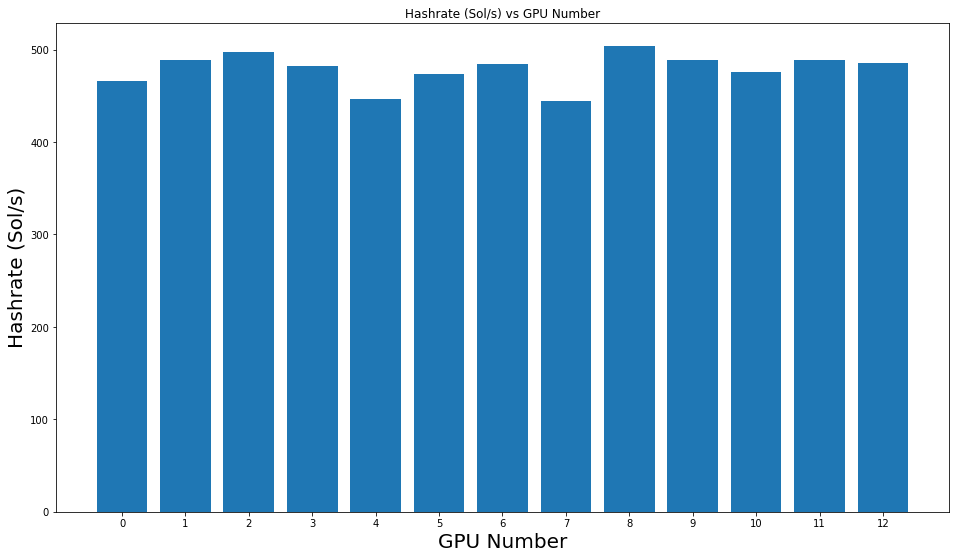

In [1652]:
plt.bar(gpu_all_sols.index.values, gpu_all_sols['Mean Sol/s'], align='center', alpha=1.0)
plt.title('Hashrate (Sol/s) vs GPU Number')
plt.xlabel('GPU Number', size = 20)
plt.ylabel('Hashrate (Sol/s)', size = 20)
plt.xticks(gpu_all_sols.index.values)
plt.show()

# Superimpose average for all gpus

# Pie graph

# Others

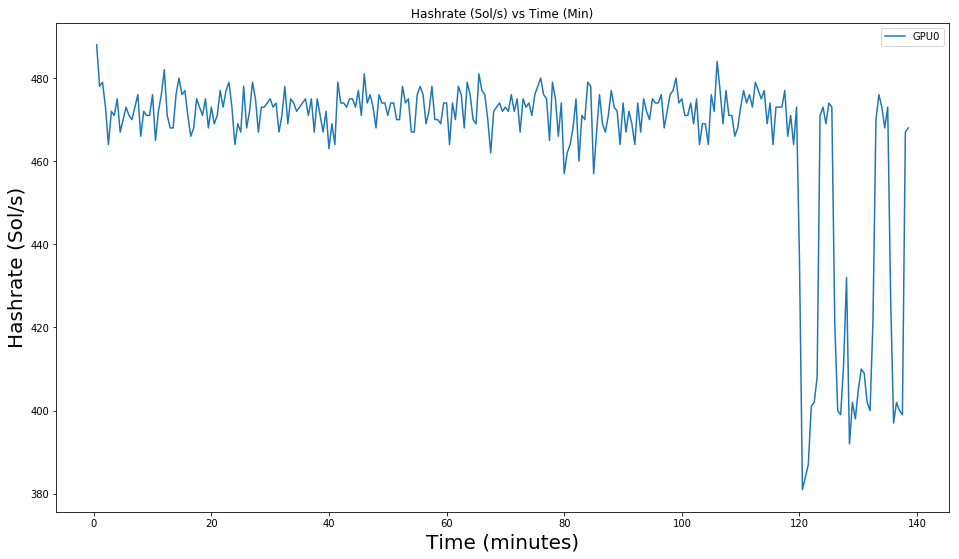

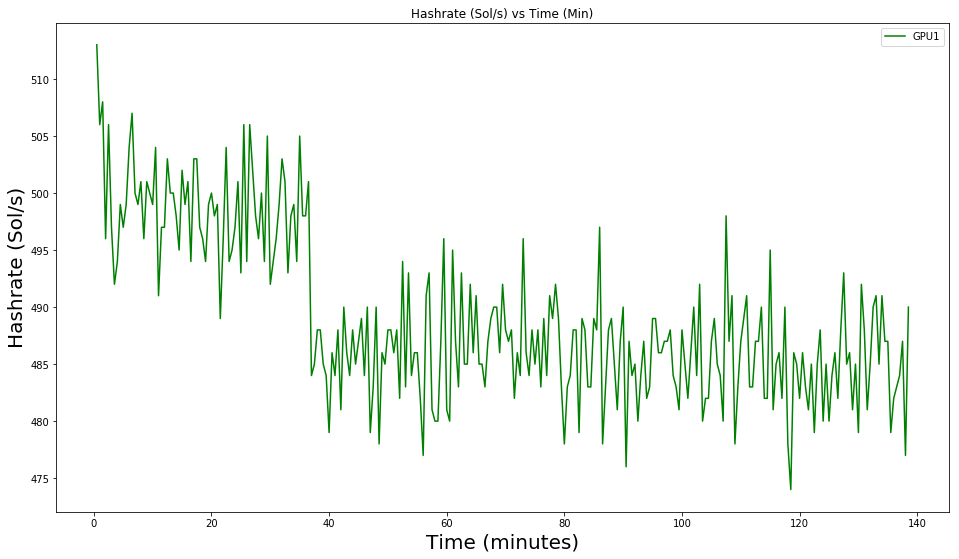

In [1653]:
# Per GPU as function of time

plt.plot(df_gpu0_sols['Minutes'], df_gpu0_sols['Sol/s'], label = 'GPU0')
# plt.plot(df_gpu1_sols['Minutes'], df_gpu1_sols['Sol/s'], label = 'GPU1')
# plt.plot(df_gpu2_sols['Minutes'], df_gpu2_sols['Sol/s'], label = 'GPU2')
# plt.plot(df_gpu3_sols['Minutes'], df_gpu3_sols['Sol/s'], label = 'GPU3')
# plt.plot(df_gpu4_sols['Minutes'], df_gpu4_sols['Sol/s'], label = 'GPU4')
# plt.plot(df_gpu5_sols['Minutes'], df_gpu5_sols['Sol/s'], label = 'GPU5')
# plt.plot(df_gpu6_sols['Minutes'], df_gpu6_sols['Sol/s'], label = 'GPU6')
# plt.plot(df_gpu7_sols['Minutes'], df_gpu7_sols['Sol/s'], label = 'GPU7')
# plt.plot(df_gpu8_sols['Minutes'], df_gpu8_sols['Sol/s'], label = 'GPU8')
# plt.plot(df_gpu9_sols['Minutes'], df_gpu9_sols['Sol/s'], label = 'GPU9')
# plt.plot(df_gpu10_sols['Minutes'], df_gpu10_sols['Sol/s'], label = 'GPU10')
# plt.plot(df_gpu11_sols['Minutes'], df_gpu11_sols['Sol/s'], label = 'GPU11')
# plt.plot(df_gpu12_sols['Minutes'], df_gpu12_sols['Sol/s'], label = 'GPU12')

plt.title('Hashrate (Sol/s) vs Time (Min)')
plt.xlabel('Time (minutes)', size = 20)
plt.ylabel('Hashrate (Sol/s)', size = 20)
#plt.yticks(fontsize=8)
#plt.xlim(0, )
#plt.ylim(0, )
#plt.figure(figsize=(200,100))
plt.rcParams["figure.figsize"] = [16,9]
plt.legend()
plt.show()

# Per GPU as function of time

# plt.plot(df_gpu0_sols['Minutes'], df_gpu0_sols['Sol/s'], label = 'GPU0')
plt.plot(df_gpu1_sols['Minutes'], df_gpu1_sols['Sol/s'], label = 'GPU1', color = 'g')
# plt.plot(df_gpu2_sols['Minutes'], df_gpu2_sols['Sol/s'], label = 'GPU2')
# plt.plot(df_gpu3_sols['Minutes'], df_gpu3_sols['Sol/s'], label = 'GPU3')
# plt.plot(df_gpu4_sols['Minutes'], df_gpu4_sols['Sol/s'], label = 'GPU4')
# plt.plot(df_gpu5_sols['Minutes'], df_gpu5_sols['Sol/s'], label = 'GPU5')
# plt.plot(df_gpu6_sols['Minutes'], df_gpu6_sols['Sol/s'], label = 'GPU6')
# plt.plot(df_gpu7_sols['Minutes'], df_gpu7_sols['Sol/s'], label = 'GPU7')
# plt.plot(df_gpu8_sols['Minutes'], df_gpu8_sols['Sol/s'], label = 'GPU8')
# plt.plot(df_gpu9_sols['Minutes'], df_gpu9_sols['Sol/s'], label = 'GPU9')
# plt.plot(df_gpu10_sols['Minutes'], df_gpu10_sols['Sol/s'], label = 'GPU10')
# plt.plot(df_gpu11_sols['Minutes'], df_gpu11_sols['Sol/s'], label = 'GPU11')
# plt.plot(df_gpu12_sols['Minutes'], df_gpu12_sols['Sol/s'], label = 'GPU12')

plt.title('Hashrate (Sol/s) vs Time (Min)')
plt.xlabel('Time (minutes)', size = 20)
plt.ylabel('Hashrate (Sol/s)', size = 20)
#plt.yticks(fontsize=8)
#plt.xlim(0, )
#plt.ylim(0, )
#plt.figure(figsize=(200,100))
plt.rcParams["figure.figsize"] = [16,9]
plt.legend()
plt.show()

In [1806]:
# Total hashrate for all gpus, from file 

#Prompt user for file input, catch with a defaut if statement
fname = input('Enter file name: ')

import re
import pandas as pd



if (len(fname) < 1): fname = 'ewbf.log'
    
    
# Open file and isolate lines that start with 
fh = open(fname)

hashrate = dict()
lst = list()
for lines in fh:
    if not lines.startswith('Total speed: '): continue
    #if re.search('^X\S*: [0-9.]+', line):    
    x = lines.split(' ')
    
    hashrate[all] = x[2]
    
    
    for key in hashrate:
        value = hashrate[key]
        lst.append( (value) )
#print(lst)

df = pd.DataFrame(lst)
df.columns = ['Sol/s']
df_hash_all = df
df_hash_all.head()



# or from df by totaling data from individual gpu's --- need to reset index for each df then create a dictionary
# to count and append to a list to create new df.



Enter file name: 


,Sol/s
0,3913
1,5835
2,6308
3,6277
4,6281


In [1807]:
#df_hash_all = df.loc[df['GPU Number'] == 'GPU2:']
rows = df.index.values
#rows_0 = df_gpu0_sols.index.values

lst = list()

for time in rows:
    secs = time * 30
    mins = secs / 60
    minutes = round(mins, 2)
    hrs = minutes / 60
    #print(minutes)
    
        
    lst.append(minutes)
#print(lst)

columns = ['Minutes']    
df_minutes = pd.DataFrame(lst, columns = columns)
df_minutes
df_hash_all = pd.concat([df_hash_all, df_minutes], axis = 1)
df_hash_all.head()

,Sol/s,Minutes
0,3913,0.0
1,5835,0.5
2,6308,1.0
3,6277,1.5
4,6281,2.0


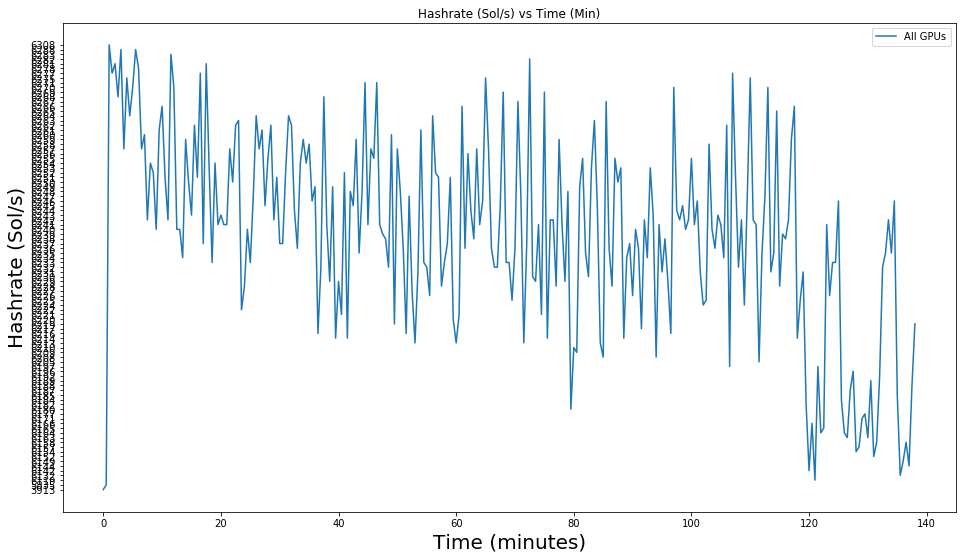

In [1809]:
plt.plot(df_hash_all['Minutes'], df_hash_all['Sol/s'], label = 'All GPUs')


plt.title('Hashrate (Sol/s) vs Time (Min)')
plt.xlabel('Time (minutes)', size = 20)
plt.ylabel('Hashrate (Sol/s)', size = 20)
#plt.yticks()
#plt.xlim(0, )
#plt.ylim(0, )
#plt.figure(figsize=(200,100))
plt.rcParams["figure.figsize"] = [16,9]

plt.legend()
plt.show()



In [1657]:
df_hash_all['Sol/s'].describe()

count      277
unique      95
top       6241
freq        14
Name: Sol/s, dtype: object

In [1658]:
# Average Per GPU

df_hash_all['Sol/s']= df_hash_all['Sol/s'].astype(int)
all_mean = round(df_hash_all['Sol/s'].mean(), 2)

print('The average hashrate for all gpus combined is:') 
all_mean


The average hashrate for all gpus combined is:


6226.39

In [1659]:
# Average among all GPU's
mean_gpu = round((all_mean / 13), 2)
print('The average hashrate per gpu is:') 
mean_gpu

The average hashrate per gpu is:


478.95

In [1660]:
df_gpu0_sols
round((df_gpu0_sols['Sol/s'].mean()), 2)

465.97

In [1810]:
# or from df by totaling data from individual gpu's --- need to reset index for each df then create a dictionary
# to count and append to a list to create new df.

gpu0_sols = list()
gpu0_sols = df_gpu0_sols['Sol/s'].values
df0 = pd.DataFrame(gpu0_sols)
df0.columns = ['GPU0']

gpu1_sols = df_gpu1_sols['Sol/s'].values
df1 = pd.DataFrame(gpu1_sols)
df1.columns = ['GPU1']

gpu2_sols = df_gpu2_sols['Sol/s'].values
df2 = pd.DataFrame(gpu2_sols)
df2.columns = ['GPU2']

gpu3_sols = df_gpu3_sols['Sol/s'].values
df3 = pd.DataFrame(gpu3_sols)
df3.columns = ['GPU3']

gpu4_sols = df_gpu4_sols['Sol/s'].values
df4 = pd.DataFrame(gpu4_sols)
df4.columns = ['GPU4']

gpu5_sols = df_gpu5_sols['Sol/s'].values
df5 = pd.DataFrame(gpu5_sols)
df5.columns = ['GPU5']

gpu6_sols = df_gpu6_sols['Sol/s'].values
df6 = pd.DataFrame(gpu6_sols)
df6.columns = ['GPU6']

gpu7_sols = df_gpu7_sols['Sol/s'].values
df7 = pd.DataFrame(gpu7_sols)
df7.columns = ['GPU7']

gpu8_sols = df_gpu8_sols['Sol/s'].values
df8 = pd.DataFrame(gpu8_sols)
df8.columns = ['GPU8']

gpu9_sols = df_gpu9_sols['Sol/s'].values
df9 = pd.DataFrame(gpu9_sols)
df9.columns = ['GPU9']

gpu10_sols = df_gpu10_sols['Sol/s'].values
df10 = pd.DataFrame(gpu10_sols)
df10.columns = ['GPU10']

gpu11_sols = df_gpu11_sols['Sol/s'].values
df11 = pd.DataFrame(gpu11_sols)
df11.columns = ['GPU11']

gpu12_sols = df_gpu12_sols['Sol/s'].values
df12 = pd.DataFrame(gpu12_sols)
df12.columns = ['GPU12']

df = pd.concat([df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], axis = 1)
df.head()


,GPU0,GPU1,GPU2,GPU3,GPU4,GPU5,GPU6,GPU7,GPU8,GPU9,GPU10,GPU11,GPU12
0,488,513,498,496,465,495,0,451,0,507,0,0,0
1,478,506,489,498,448,482,489,451,508,505,0,494,487
2,479,508,494,491,447,481,483,441,504,502,496,491,491
3,473,496,492,489,450,474,489,445,505,496,492,490,486
4,464,506,500,492,449,471,480,451,504,493,491,493,487


In [1814]:
time = df.index.values
sec = 30 + (time * 30)
minutes = sec / 60  
hrs = minutes / 60

minutes = pd.DataFrame(minutes)
minutes.columns = ['Minutes']
minutes.head()

,Minutes
0,0.5
1,1.0
2,1.5
3,2.0
4,2.5


In [1815]:
sols_time = df.sum(axis = 1)

sols_time = pd.DataFrame(sols_time)
sols_time.columns = ['Total Sol/s']
sols_time.head()

,Total Sol/s
0,3913
1,5835
2,6308
3,6277
4,6281


In [1762]:
df = pd.concat([minutes, df0, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, sols_time], axis = 1)
df

,Minutes,GPU0,GPU1,GPU2,GPU3,GPU4,GPU5,GPU6,GPU7,GPU8,GPU9,GPU10,GPU11,GPU12,Total Sol/s
0,0.5,488,513,498,496,465,495,0,451,0,507,0,0,0,4401.5
1,1.0,478,506,489,498,448,482,489,451,508,505,0,494,487,6314.0
2,1.5,479,508,494,491,447,481,483,441,504,502,496,491,491,6788.5
3,2.0,473,496,492,489,450,474,489,445,505,496,492,490,486,6752.0
4,2.5,464,506,500,492,449,471,480,451,504,493,491,493,487,6747.5
5,3.0,472,497,492,484,453,466,486,443,499,493,502,494,487,6743.0
6,3.5,471,492,501,487,457,473,481,449,500,497,500,491,489,6762.5
7,4.0,475,494,493,484,442,475,486,439,506,490,494,488,491,6736.0
8,4.5,467,499,494,483,441,476,486,444,509,494,501,492,489,6746.5
9,5.0,470,497,500,485,447,476,476,442,504,496,495,492,484,6739.0


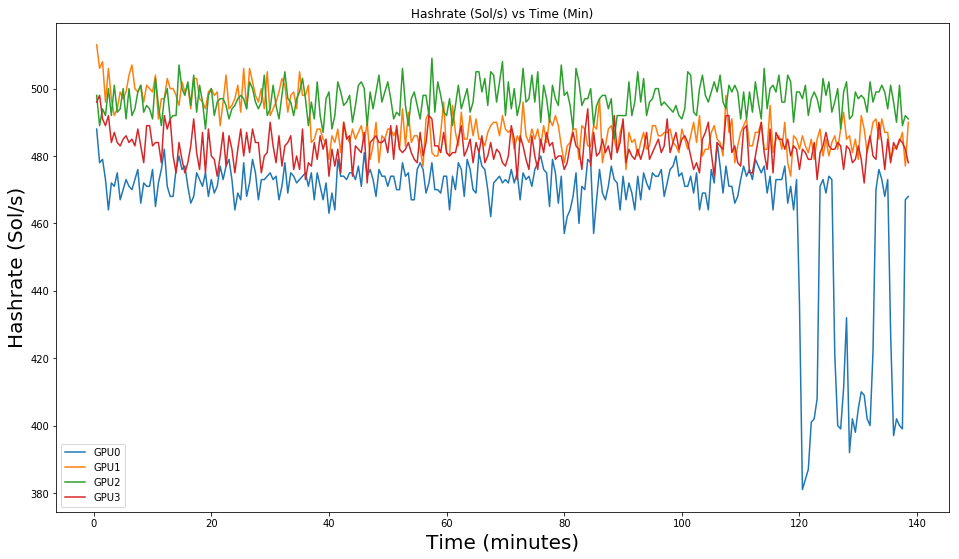

In [1763]:
plt.plot(df['Minutes'], df['GPU0'], label = 'GPU0')
plt.plot(df['Minutes'], df['GPU1'], label = 'GPU1')
plt.plot(df['Minutes'], df['GPU2'], label = 'GPU2')
plt.plot(df['Minutes'], df['GPU3'], label = 'GPU3')


plt.title('Hashrate (Sol/s) vs Time (Min)')
plt.xlabel('Time (minutes)', size = 20)
plt.ylabel('Hashrate (Sol/s)', size = 20)
#plt.yticks()
#plt.xlim(0, )
#plt.ylim(0, )
#plt.figure(figsize=(200,100))
plt.rcParams["figure.figsize"] = [16,9]

plt.legend()
plt.show()

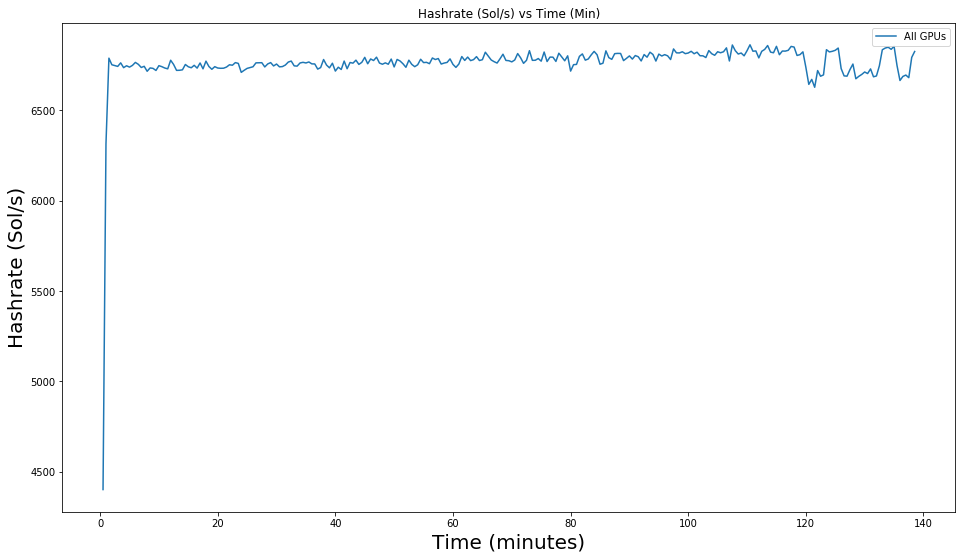

In [1764]:
plt.plot(df['Minutes'], df['Total Sol/s'], label = 'All GPUs')


plt.title('Hashrate (Sol/s) vs Time (Min)')
plt.xlabel('Time (minutes)', size = 20)
plt.ylabel('Hashrate (Sol/s)', size = 20)
#plt.yticks()
#plt.xlim(0, )
#plt.ylim(0, )
#plt.figure(figsize=(200,100))
plt.rcParams["figure.figsize"] = [16,9]

plt.legend()
plt.show()



In [1802]:
sm = df.sum(axis = 0)
sm = pd.DataFrame(sm)
sm.columns = ['Value']
sm.head()

,Value
Minutes,19251.5
GPU0,129074.0
GPU1,135497.0
GPU2,137625.0
GPU3,133645.0


In [1801]:

sm = df.sum(axis = 0)
sm = pd.DataFrame(sm)
sm.columns = ['Value']
sm.head()


totalminutes = df.get_value(index = 276, col = 'Minutes')
totalminutes

sm['Mean Sol/s'] = (sm.loc[['GPU0',
                        'GPU1',
                        'GPU2',
                        'GPU3',
                        'GPU4',
                        'GPU5',
                        'GPU6',
                        'GPU7',
                        'GPU8',
                        'GPU9',
                        'GPU10',
                        'GPU11',
                        'GPU12',
                        'Total Sol/s'
                       ], 'Value']) / (totalminutes*2)


del sm['Value']
sm = sm.dropna()
sm = sm.drop(['Total Sol/s'], axis= 0)
sm



,Mean Sol/s
GPU0,465.971119
GPU1,489.158845
GPU2,496.841155
GPU3,482.472924
GPU4,446.703971
GPU5,473.216606
GPU6,484.277978
GPU7,444.530686
GPU8,504.007220
GPU9,488.895307


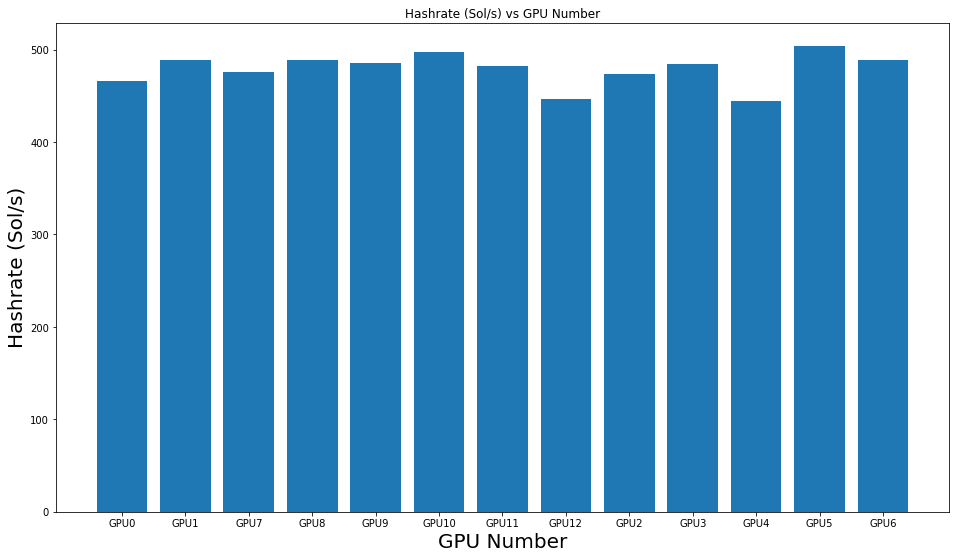

In [1789]:
plt.bar(sm.index.values, sm['Mean Sol/s'], align='center', alpha=1.0)
plt.title('Hashrate (Sol/s) vs GPU Number')
plt.xlabel('GPU Number', size = 20)
plt.ylabel('Hashrate (Sol/s)', size = 20)
plt.xticks(sm.index.values)
plt.legend()
plt.show()

In [1730]:
# Create a dictionary with gpus as the key, sol/s as value
# Create list for each gpu and append values from dictionary
# create df 